<a href="https://colab.research.google.com/github/gyurmey/tensorflow/blob/main/f1score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [67]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

len(x_train)

len(x_test)

x_train[0].shape

(28, 28)

In [11]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

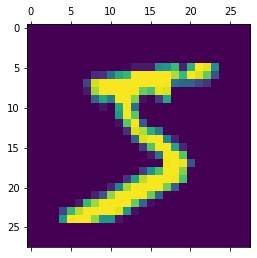

In [12]:
plt.matshow(x_train[0])

In [13]:
y_train[0]

5

In [14]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [15]:
x_train.shape

(60000, 28, 28)

In [16]:
x_train = x_train / 255
x_test = x_test / 255

In [17]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [18]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [19]:
x_train_flattened.shape

(60000, 784)

In [20]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=5)



Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4762 - accuracy: 0.8751
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3047 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2832 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2737 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2668 - accuracy: 0.9265


In [21]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2703 - accuracy: 0.9238


[0.270287424325943, 0.923799991607666]

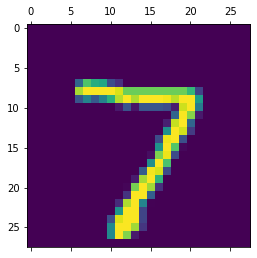

In [22]:
plt.matshow(x_test[0])

In [23]:
# Make the predictions
y_predicted = model.predict(x_test_flattened)
y_predicted[0]


313/313 [==============================] - 1s 2ms/step


array([3.13644484e-02, 3.60977538e-07, 3.20063643e-02, 9.47816253e-01,
       2.52933777e-03, 9.83887762e-02, 1.37886127e-06, 9.99856830e-01,
       1.03562705e-01, 6.84193373e-01], dtype=float32)

In [24]:
np.argmax(y_predicted[0])

7

In [25]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [26]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    0,    2,    0,    4,    5,    2,    2,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   9,   12,  901,   24,   10,    3,   13,   11,   46,    3],
       [   3,    0,   13,  931,    1,   18,    2,   10,   24,    8],
       [   2,    1,    2,    1,  919,    0,   11,    4,   10,   32],
       [  11,    3,    1,   37,   11,  753,   19,   10,   39,    8],
       [  14,    3,    4,    2,    8,    8,  914,    2,    3,    0],
       [   2,    5,   20,    6,    9,    0,    0,  949,    4,   33],
       [   8,    7,    6,   20,    9,   18,   10,   12,  877,    7],
       [  11,    7,    1,   11,   28,    5,    0,   21,    6,  919]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

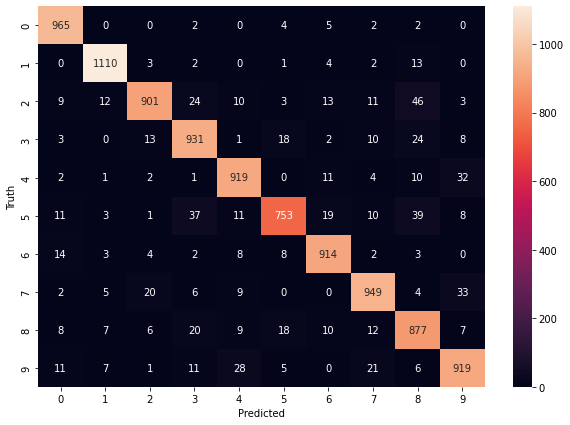

In [27]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [28]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2685 - accuracy: 0.9228
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1214 - accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0845 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0647 - accuracy: 0.9806
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0502 - accuracy: 0.9851


In [29]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0922 - accuracy: 0.9711


[0.09215408563613892, 0.9710999727249146]

313/313 [==============================] - 1s 2ms/step


Text(69.0, 0.5, 'Truth')

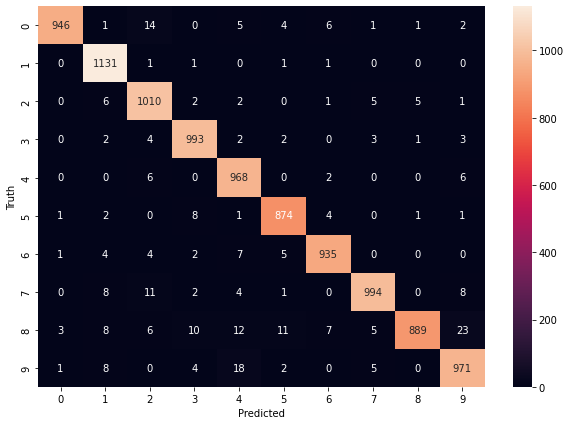

In [30]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [31]:
# Flattening data using keras Flatten class
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [32]:
# model.fit(x_train_flattened, y_train, epochs=5)

In [39]:

def f1_score(y_true, y_pred):
    """Computes the F1 score"""
    true_positives = tf.math.count_nonzero(y_pred * y_true, dtype=tf.float32)
    false_positives = tf.math.count_nonzero(y_pred * (y_true - 1), dtype=tf.float32)
    false_negatives = tf.math.count_nonzero((y_pred - 1) * y_true, dtype=tf.float32)
    
    precision = true_positives / (true_positives + false_positives + 1e-8)
    recall = true_positives / (true_positives + false_negatives + 1e-8)
    f1 = 2 * precision * recall / (precision + recall + 1e-8)
    
    return f1, precision, recall


In [40]:
# from sklearn.metrics import f1_score

In [41]:
print(y_predicted[0])

[1.3452351e-02 2.4088772e-03 6.4311552e-01 8.2991350e-01 6.6917150e-06
 1.4738777e-02 3.8719777e-06 9.9998057e-01 4.1411113e-02 5.1302891e-02]


In [49]:
y_true = tf.constant([1, 1, 1, 1])
y_pred = tf.constant([0, 1, 0, 0])

f1, precision, recall = f1_score(y_true, y_pred)

print("F1 score:", f1.numpy())
print("Precision:", precision.numpy())
print("Recall:", recall.numpy())


F1 score: 0.4
Precision: 1.0
Recall: 0.25


In [79]:
x_train.shape


(8052, 784)

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from keras.datasets import mnist
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Split the dataset into training and testing sets
# Flatten the input images
x_train = np.reshape(x_train, (x_train.shape[0], -1))

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
# X_test = np.reshape(X_test, (X_test.shape[0], -1))

# Train a classifier on the training set
# ...
# Train a logistic regression classifier on the training set
clf = LogisticRegression(random_state=42)
clf.fit(x_train, y_train)

# Make predictions on the validation set
y_pred = clf.predict(x_val)

# Calculate the F1 score
f1 = f1_score(y_val, y_pred, average='macro')
# Calculate the precision and recall
precision = precision_score(y_val, y_pred, average='macro')
recall = recall_score(y_val, y_pred, average='macro')
print("Precision:", precision)
print("Recall:", recall)
# Generate a classification report
report = classification_report(y_val, y_pred)
print(report)
# Generate a confusion matrix
cm = confusion_matrix(y_val, y_pred)
print(cm)

print("hii", f1)

Precision: 0.8635826727868459
Recall: 0.86473766824989
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        94
           1       0.97      0.96      0.96       113
           2       0.85      0.89      0.87       107
           3       0.83      0.78      0.80       120
           4       0.85      0.84      0.85        89
           5       0.85      0.80      0.83        92
           6       0.94      0.94      0.94        98
           7       0.90      0.90      0.90       123
           8       0.74      0.75      0.75        88
           9       0.82      0.82      0.82       107

    accuracy                           0.87      1031
   macro avg       0.86      0.86      0.86      1031
weighted avg       0.87      0.87      0.87      1031

[[ 91   0   1   0   1   0   0   0   1   0]
 [  0 108   1   0   0   0   0   1   3   0]
 [  0   0  95   2   3   0   2   1   3   1]
 [  4   0   5  93   0   6   1   2   4   5]
 [  0   0   1 

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from keras.datasets import mnist
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
# (X_train, y_train), (X_test, y_test) = mnist.load_data()

# Flatten the input images
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

# Split the dataset into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train a classifier on the training set
# ...
# Train a logistic regression classifier on the training set
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = clf.predict(X_val)

# Calculate the F1 score
f1 = f1_score(y_val, y_pred, average='macro')
# Calculate the precision and recall
precision = precision_score(y_val, y_pred, average='macro')
recall = recall_score(y_val, y_pred, average='macro')
print("Precision:", precision)
print("Recall:", recall)
# Generate a classification report
report = classification_report(y_val, y_pred)
print(report)
# Generate a confusion matrix
cm = confusion_matrix(y_val, y_pred)
print(cm)

print("hii", f1)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precision: 0.9214273709366504
Recall: 0.9213299366860115
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1175
           1       0.96      0.97      0.96      1322
           2       0.90      0.90      0.90      1174
           3       0.90      0.89      0.90      1219
           4       0.93      0.94      0.94      1176
           5       0.90      0.87      0.89      1104
           6       0.95      0.95      0.95      1177
           7       0.93      0.93      0.93      1299
           8       0.88      0.89      0.88      1160
           9       0.91      0.90      0.90      1194

    accuracy                           0.92     12000
   macro avg       0.92      0.92      0.92     12000
weighted avg       0.92      0.92      0.92     12000

[[1139    0    6    3    4    4    5    4    8    2]
 [   0 1283    8    6    2    3    1    2   13    4]
 [   1   18 1054   14   13    5   18   17   29    5]
 [   4    8   36 1090    